## Here the model that predicts shoe size based on specific features will be created

In [147]:
# loading required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [148]:
# loading data from csv files

data = pd.read_csv('data.csv')

data.head() #viewing the data 

,Height,Weight,Shoe_size,Gender
0,180,79.0,42,M
1,165,65.0,41,M
2,178,72.0,42,M
3,160,53.0,43,M
4,182,78.0,36,M


In [149]:
data.info() #viewing dataset for datatypes present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height     109 non-null    int64  
 1   Weight     109 non-null    float64
 2   Shoe_size  109 non-null    int64  
 3   Gender     109 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


In [150]:
data.isnull().sum() # checking for null rows

Height       0
Weight       0
Shoe_size    0
Gender       0
dtype: int64

***From the data abaove we have categorical data in Gender Column this needs to be converted to numerical variables***

In [134]:
# using LabeEncoder to one-hot encode the categorical variable


le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])

print(data.head()) #viewing outcome of one-hor wncoding

   Height  Weight  Shoe_size  Gender
0     180    79.0         42       1
1     165    65.0         41       1
2     178    72.0         42       1
3     160    53.0         43       1
4     182    78.0         36       1


*Now Gender column has Male as 1 and female as 0, on to distribution countplot*

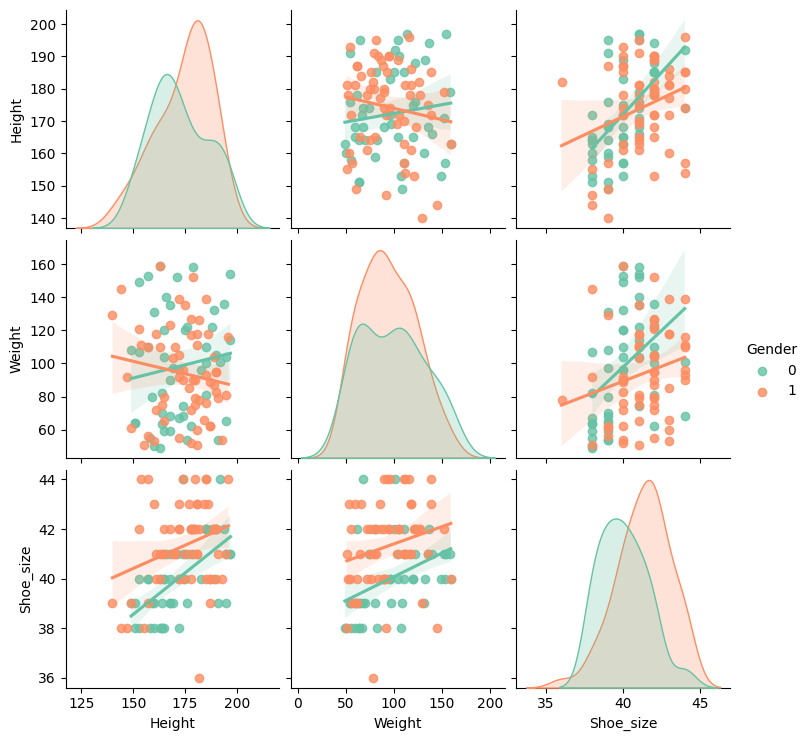

In [ ]:
# Create a pairplot for the dataset to visualize relationships

pairplot = sns.pairplot(data, hue="Gender", diag_kind="kde",kind="reg", palette="Set2")



# Display the plot

plt.show()



*From the Pairplot you can observe that Height and Shoe_size is experiencing a bit of linear relationship as increase in height means potential increase in shoe size, non-linear relationship between height and weight, linear relationship between weight and shoesize is not so obvious*

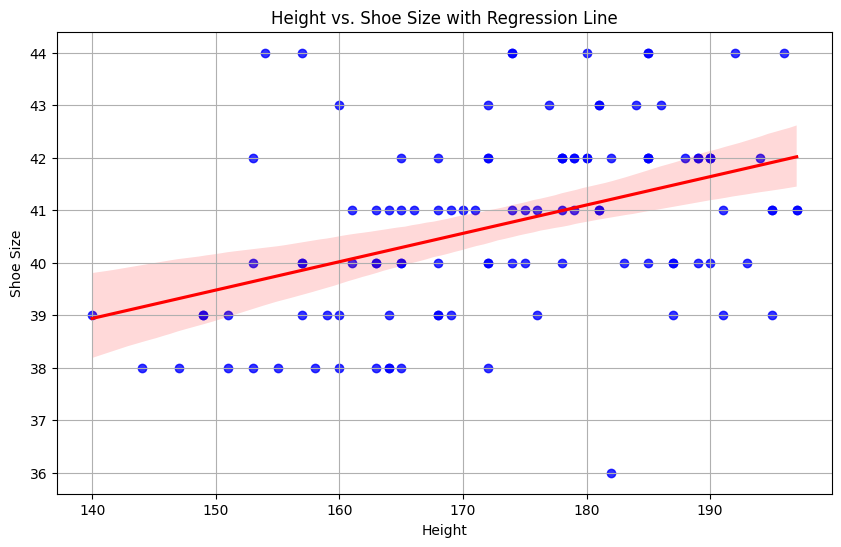

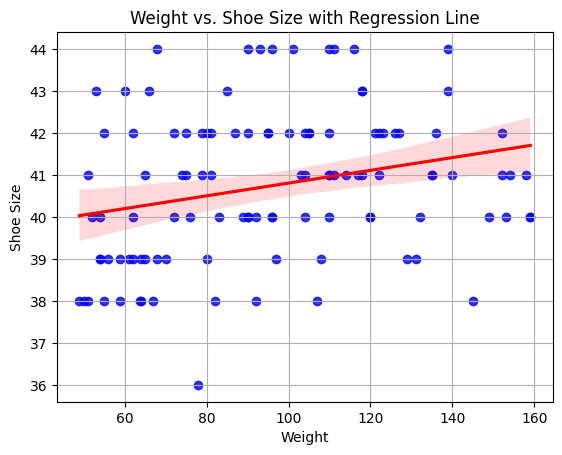

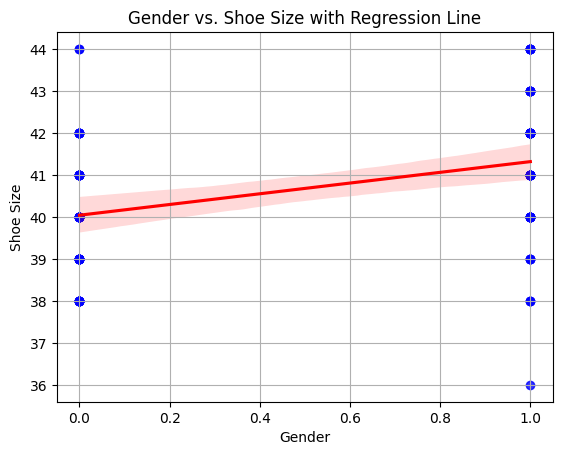

In [ ]:
# plotting for regression line btw features
plt.figure(figsize=(10, 6)) 

for _ in data.columns:
    if _ != 'Shoe_size':
        sns.regplot(x=_, y="Shoe_size", data=data, scatter_kws={'color':'blue'}, line_kws={'color':'red'}) 
        plt.title(f'{_} vs. Shoe Size with Regression Line') 
        plt.xlabel(f'{_}') 
        plt.ylabel('Shoe Size') 
        plt.grid(True) 
        plt.show()





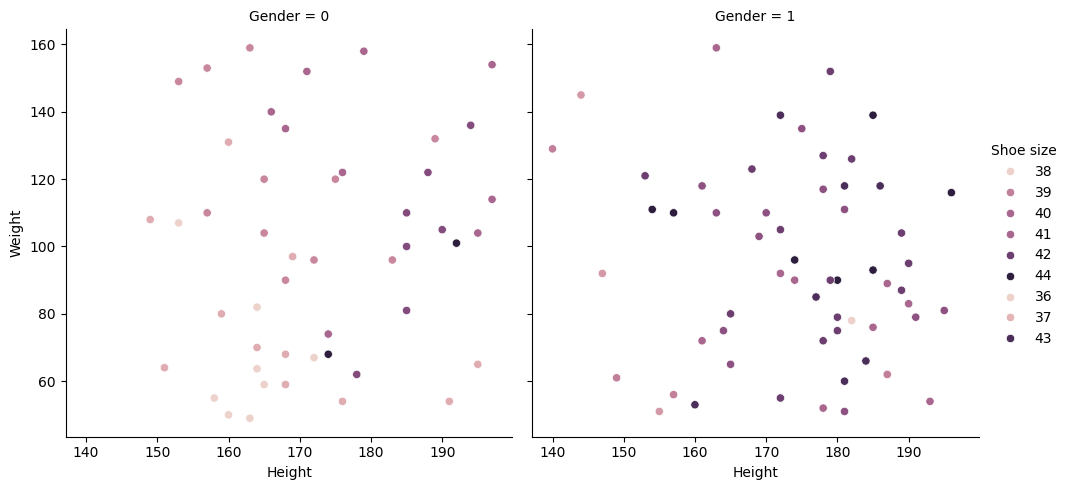

In [ ]:
# lets try plotting a scatter plot of features  interactions

# Scatter plot
plot = sns.FacetGrid(data, col='Gender', height=5)
plot.map(sns.scatterplot, 'Height', 'Weight', 'Shoe_size', sizes=(50, 200))
plot.add_legend(title="Shoe size")
plt.show()





*The scatter plot expands more on the info from the pairplot. The female gender is observed to have lower count of big shoe sizes compared to males, this could indicate a relationship of height and weight*

In [ ]:
data.corr() #viewing ccorr between features

,Height,Weight,Shoe_size,Gender
Height,1.000000,-0.013745,0.414296,0.076097
Weight,-0.013745,1.000000,0.260970,-0.070175
Shoe_size,0.414296,0.260970,1.000000,0.359984
Gender,0.076097,-0.070175,0.359984,1.000000


*Correlation table suggests that there is possible relationship between increase in height, weight and gender to increase in shoe size but is not pronunced, this can be implied as shoe size may be a feature dependent on interaction of the three features. Let's build a model*

In [ ]:
# using a simple ols model as shoe size seems to be the dependent variable

formula = "Shoe_size ~ Height + Gender + Weight "

model = smf.ols(formula=formula, data=data).fit()

print(model.params[0])
print(model.params[1])

29.57870254039735
0.05107269358986531


C:\Users\X1 Carbon\AppData\Local\Temp\ipykernel_13596\2590593884.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model.params[0])
C:\Users\X1 Carbon\AppData\Local\Temp\ipykernel_13596\2590593884.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model.params[1])
